In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from utils import wavei

In [2]:
def waveeq(T=10, M=1600, N=100, f_length_based=False, plot=True):
    
    L = 10
    T = T
    c = 1.5
    N = N
    h = L/N # Horizontal resolution
    T=10
    M=M
    # Test: increase duration of simulation to see effect 
    # of dispersion and effective wavenumber / speed
    # (due to 2nd order scheme)
    k = T/M # Time resolution (Dt)
    C = c*k/h # Try a case where C>1 e.g. increase Dx or increase Dt
    Lf = 0.5
    
    x = np.arange(0, h + L, h)
    t = np.arange(0, k + T, k)
    
    if not f_length_based:
        fn_str = 'fx = exp(-0.5*(5-x)^2/0.5^2).*cos((x-5)*pi)'
        f = lambda x: np.exp(-0.5 * (5 - x) ** 2 / 0.5 ** 2) * np.cos((x - 5)*np.pi)
    else:
        fn_str = f'exp(-0.5*({L/2}-x)^2/({Lf}^2)'
        f = lambda x: np.exp(-0.5*(L/2-x)**2/(Lf**2))
        
    g = lambda x: np.zeros_like(x)
    
    n = len(x)
    m = len(t)
    u = np.zeros((n, m))
    
    # Second order starter
    u[1:n-1, 0] = f(x[1:n-1])
    for i in range(1, n-1):
        u[i, 1] = C**2 * (u[i - 1, 0] + u[i + 1, 0])/2 + k * g(x[i]) + (1 - C**2) * u[i, 0]
    
    # CDS: Iteration in time (j) and space (i)
    for j in range(1, m-1):
        for i in range(1, n-1):
            u[i, j+1] = C**2 * (u[i + 1, j] + u[i-1, j]) + (2 - 2 * C**2) * u[i, j] - u[i, j-1]   
    
    if plot:
        plt.figure()
        plt.plot(x, f(x))
        plt.title(fn_str, fontsize=16)
        
        plt.figure()
        plt.xlabel('x', fontsize=14)
        plt.ylabel('t', fontsize=14)
        plt.title('Waves on String', fontsize=16)
        wavei(u.T, x, t)

        plt.figure()
        dn = int(np.floor(n/10))
        uu = u[0:n:dn].T
        plt.plot(t, (uu + np.arange(uu.shape[-1]))[:, 1:-1])
        plt.xlim(0, uu.shape[-1]-1)
        plt.ylim(0, uu.shape[-1]-1)
        plt.title('Waves on String', fontsize=16);
    
    return u.T, x, t


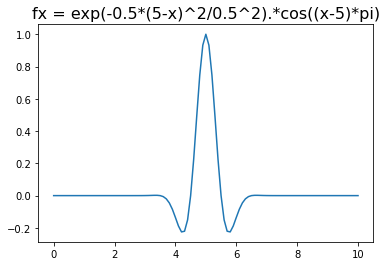

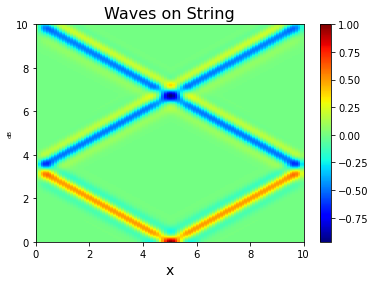

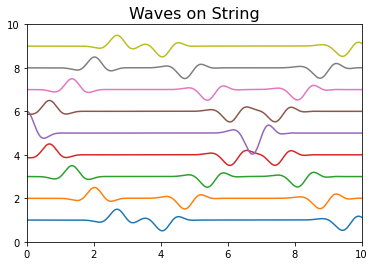

In [3]:
waveeq();

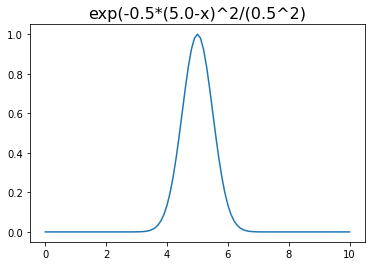

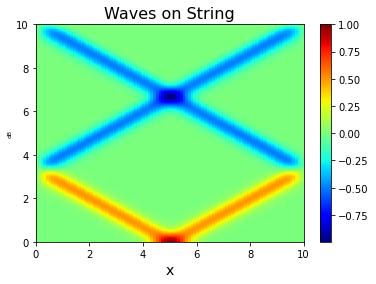

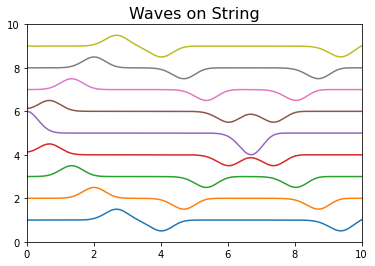

In [4]:
waveeq(f_length_based=True);

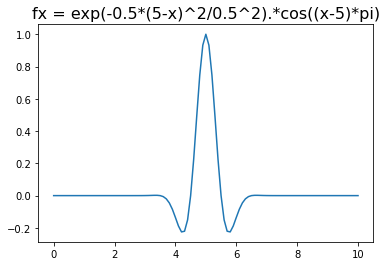

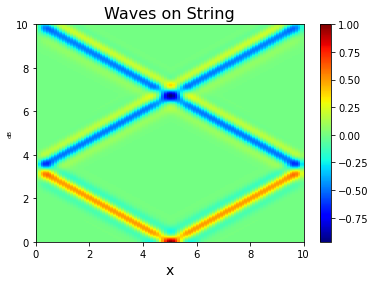

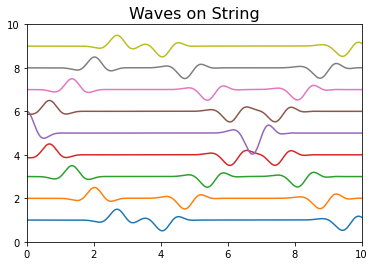

In [5]:
waveeq(T=100, M=1600);

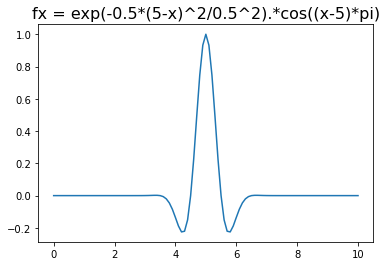

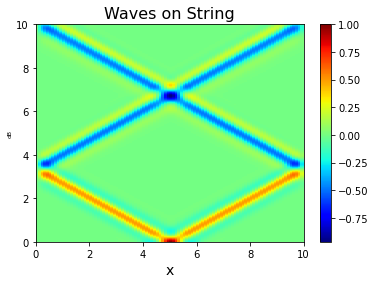

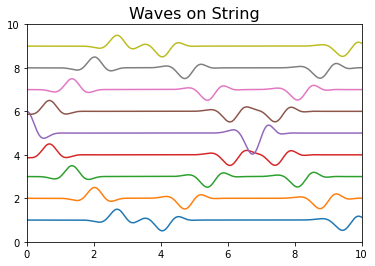

In [6]:
waveeq(T=40, M=8000);

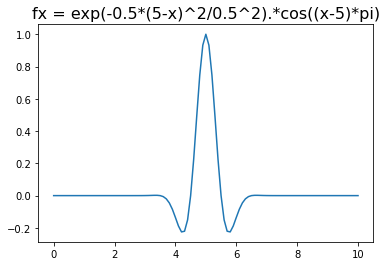

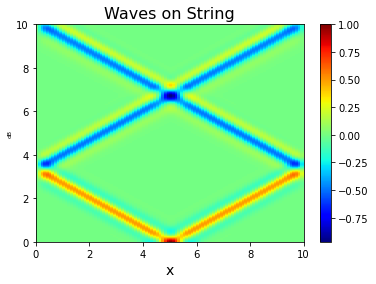

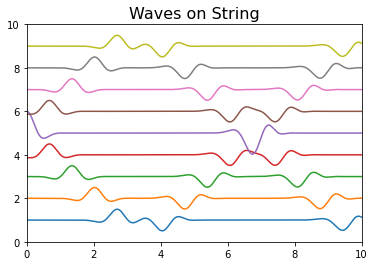

In [7]:
waveeq(T=100, M=4000);

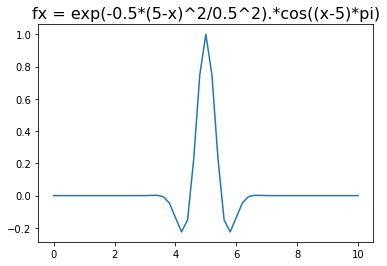

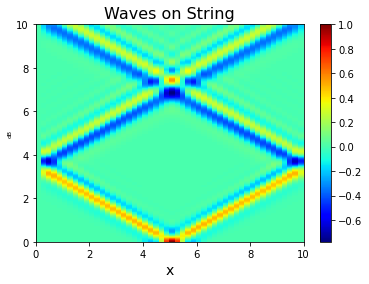

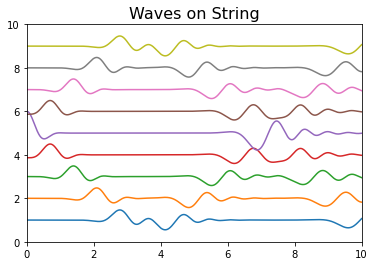

In [8]:
waveeq(T=100, M=4000, N=50);